# 2011120322 홍성민 기계학습 프로젝트 보고서 겸 커널

# Data Description

해당 데이터는 KDD Cup 1999 Dataset을 가공한 네트워크 칩입 감지 시스템용 데이터이다. 각 Feature들은 어떤 protocol type을 사용하는 지 혹은 어떤 service를 사용하는 지 등의 내용를 담고 있다. Class는 현재 네트워크가 침입을 당한 상태인 지 만약 침입을 당하였다면 어떤 종류의 침입을 당했는 지를 나타낸다.

# Feature Description

## Total 41 Features.

duration: continuous.

protocol_type: symbolic.

service: Numeric, categorical

flag: Numeric, categorical

src_bytes: continuous.

dst_bytes: continuous.

land: symbolic.

wrong_fragment: continuous.

urgent: continuous.

hot: continuous.

num_failed_logins: continuous.

logged_in: symbolic.

num_compromised: continuous.

root_shell: continuous.

su_attempted: continuous.

num_root: continuous.

num_file_creations: continuous.

num_shells: continuous.

num_access_files: continuous.

num_outbound_cmds: continuous.

is_host_login: symbolic.

is_guest_login: symbolic.

count: continuous.

srv_count: continuous.

serror_rate: continuous.

srv_serror_rate: continuous.

rerror_rate: continuous.

srv_rerror_rate: continuous.

same_srv_rate: continuous.

diff_srv_rate: continuous.

srv_diff_host_rate: continuous.

dst_host_count: continuous.

dst_host_srv_count: continuous.

dst_host_same_srv_rate: continuous.

dst_host_diff_srv_rate: continuous.

dst_host_same_src_port_rate: continuous.

dst_host_srv_diff_host_rate: continuous.

dst_host_serror_rate: continuous.

dst_host_srv_serror_rate: continuous.

dst_host_rerror_rate: continuous.

dst_host_srv_rerror_rate: continuous.

보다 자세한 설명은 http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html 를 참조(가공된 데이터이기 때문에, 사이트와 다른 점이 있음을 염두할것.)

# Class Description

"Normal", "dos", "u2r", "r2l", "probe" 5개의 Class가 존재한다.

Normal은 정상을 의미하며, 나머지 4개는 네트워크상 침입 기법들의 이름들이다.

# Pandas로 데이터 불러오기

In [1]:
import pandas as pd
data = pd.read_csv('train_data.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null int64
flag                           125973 non-null int64
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 no

Except for attribute of Protocol type and xAttack(label), everything is numeric value

In [3]:
data.describe()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,125973.000000,125973.000000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,32.086288,2.575179,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,16.462574,1.141552,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,20.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,25.000000,2.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,50.000000,4.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,70.000000,11.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data.xAttack.unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

The labels can be derived by classifer, not regressor. The number of output is 5

In [5]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

As TA described, there is no missing values in the given dataset.

In [6]:
data.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,dos


In [7]:
data.logged_in

0         0
1         0
2         0
3         1
4         1
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        1
13        1
14        0
15        0
16        1
17        0
18        1
19        1
20        0
21        0
22        1
23        0
24        0
25        1
26        0
27        1
28        1
29        1
         ..
125943    1
125944    1
125945    1
125946    0
125947    0
125948    0
125949    0
125950    0
125951    1
125952    1
125953    0
125954    1
125955    0
125956    0
125957    1
125958    0
125959    1
125960    1
125961    1
125962    0
125963    1
125964    0
125965    1
125966    0
125967    1
125968    0
125969    0
125970    1
125971    0
125972    1
Name: logged_in, Length: 125973, dtype: int64

In [8]:
data.protocol_type.unique() #check whether there is distorted values such as Icmp and Udp

array(['icmp', 'udp', 'tcp'], dtype=object)

Data modification is not needed. (대소문자 혼용 없음)

### TEST csv 파일 불러들이기

In [9]:
#import test dataset
test = pd.read_csv("test_data.csv")

In [10]:
test.protocol_type.unique()

array(['icmp', 'udp', 'tcp'], dtype=object)

In [13]:
test.shape, data.shape

((10000, 43), (125973, 42))

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 43 columns):
Unnamed: 0                     10000 non-null int64
duration                       10000 non-null int64
protocol_type                  10000 non-null object
service                        10000 non-null int64
flag                           10000 non-null int64
src_bytes                      10000 non-null int64
dst_bytes                      10000 non-null int64
land                           10000 non-null int64
wrong_fragment                 10000 non-null int64
urgent                         10000 non-null int64
hot                            10000 non-null int64
num_failed_logins              10000 non-null int64
logged_in                      10000 non-null int64
num_compromised                10000 non-null int64
root_shell                     10000 non-null int64
su_attempted                   10000 non-null int64
num_root                       10000 non-null int64
num_fil

In [14]:
test.isnull().sum()

Unnamed: 0                     0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [16]:
test = test.drop('Unnamed: 0',1)

In [17]:
test.shape, data.shape

((10000, 42), (125973, 42))

## Data-preprocessing (one-hot encoding)

In [18]:
data.iloc[:]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,icmp,50,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos
6,0,icmp,50,4,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
7,0,icmp,50,4,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,dos
8,0,icmp,52,4,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
9,0,icmp,50,4,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,dos


In [19]:
prot_types = pd.get_dummies(data.protocol_type)

In [18]:
prot_types.sample(5)

,icmp,tcp,udp
47789,1,0,0
47208,0,0,1
66695,1,0,0
98114,0,0,1
118493,1,0,0


In [20]:
data = data.merge(prot_types, left_index= True, right_index=True)

In [22]:
data = data.drop(['protocol_type'],1)

In [23]:
data.tail(4)

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,icmp,tcp,udp
125969,8,50,2,105,145,0,0,0,0,0,...,0.01,0.0,0.00,0.0,0.00,0.0,normal,0,0,1
125970,0,55,2,2231,384,0,0,0,0,0,...,0.00,0.0,0.72,0.0,0.01,0.0,normal,1,0,0
125971,0,31,4,0,0,0,0,0,0,0,...,0.00,0.0,1.00,1.0,0.00,0.0,dos,1,0,0
125972,0,20,2,151,0,0,0,0,0,0,...,0.30,0.0,0.00,0.0,0.00,0.0,normal,1,0,0


In [24]:
prot_types2 = pd.get_dummies(test.protocol_type)

In [30]:
prot_types2.sample(3)

,icmp,tcp,udp
9160,1,0,0
689,1,0,0
5190,1,0,0


In [26]:
test = test.merge(prot_types2, left_index = True, right_index = True)

In [29]:
test = test.drop(['protocol_type'],1)

In [31]:
test.tail(4)

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,icmp,tcp,udp
9996,0,25,2,238,6882,0,0,0,0,0,...,0.14,0.05,0.0,0.0,0.00,0.0,normal,1,0,0
9997,0,50,2,54,55,0,0,0,0,0,...,0.81,0.00,0.0,0.0,0.00,0.0,normal,0,0,1
9998,0,25,2,228,5210,0,0,0,0,0,...,0.01,0.04,0.0,0.0,0.00,0.0,normal,1,0,0
9999,282,20,2,160,597,0,0,0,2,0,...,0.00,0.00,0.0,0.0,0.82,0.0,r2l,1,0,0


One-hot encoding for Protocol_type has been finished

## Check duplicated instances

혹시라도, 중복된 데이터가 있다면, 학습과정에서 왜곡을 초래할 수 있고, 시간이나 리소스 등에서도 손해를 야기할 수 있다. 

따라서 중복 데이터를 검사하고 이를 제거한다.

In [32]:
duplicate = data.duplicated()

In [33]:
duplicate[8935]

True

In [34]:
duplicate.value_counts()

False    125941
True         32
dtype: int64

In [35]:
import copy
data2 = copy.deepcopy(data)

In [36]:
data2 = data2.drop_duplicates()

In [37]:
data2.shape, data.shape

((125941, 44), (125973, 44))

Redundant instances have been removed from data2. Total number of instances are 125941.

Data2 will contain unique instances

In [249]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BaseNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn_evaluation import plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

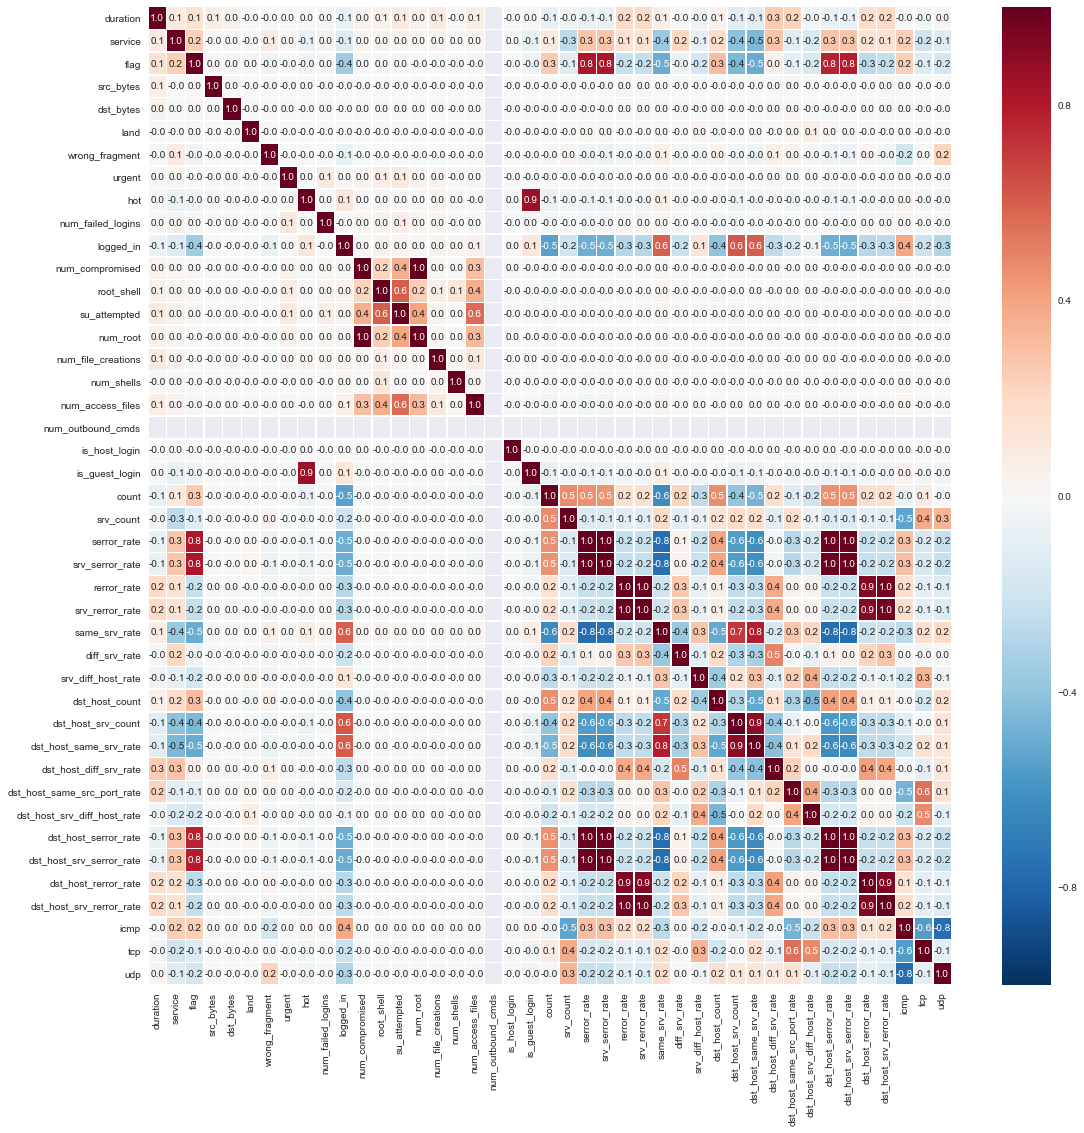

In [39]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

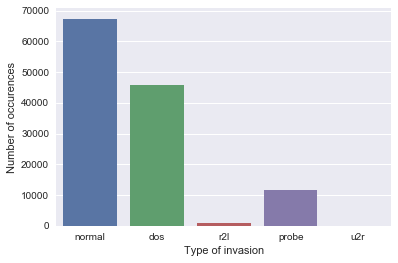

In [40]:
sns.countplot(data2.xAttack)
plt.xlabel('Type of invasion')
plt.ylabel('Number of occurences')
plt.show()

In [41]:
data2.xAttack.value_counts()

normal    67343
dos       45909
probe     11642
r2l         995
u2r          52
Name: xAttack, dtype: int64

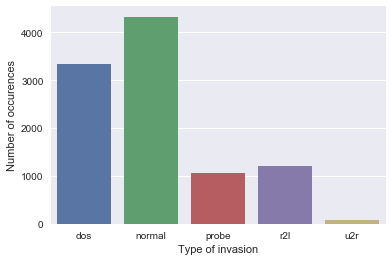

In [42]:
sns.countplot(test.xAttack)
plt.xlabel('Type of invasion')
plt.ylabel('Number of occurences')
plt.show()

##### 현재까지 상황정리
train(as data), test(as test) 모두 import 완료 후 데이터 점검

두 데이터 셋 모두 object type을 가지는 protocol_type one-hot encoding 완료

data에 대해선 duplicated 제거, data2 생성

이제 필요한 것: training the trainset, minmax normalization

## Split the data into train and labels

In [43]:
labels = data2.xAttack

In [44]:
train = data2.drop('xAttack',1)

In [45]:
labels.shape, train.shape

((125941,), (125941, 43))

In [46]:
data2.shape

(125941, 44)

In [47]:
labels.sample(5)

61592        dos
85721        dos
41914        dos
12846     normal
100323       dos
Name: xAttack, dtype: object

### Split the test into test_attributes (as testat) and test_label (as tesla)

In [48]:
tesla = test.xAttack

In [49]:
testat = test.drop('xAttack',1)

In [50]:
tesla.shape, testat.shape

((10000,), (10000, 43))

## Normalization

Normailization을 적용한 데이터 셋과 그러지 않은 데이터셋을 구분해서 가지고 있다가 실험에서 비교하여 사용할 수 있도록 하는 것이 나을 것으로 보임. 

추후 성능을 보고 어떤 데이터를 활용할지 결정.

In [51]:
min_max = MinMaxScaler()

In [52]:
normal_train = min_max.fit_transform(train)

In [56]:
train.columns

Index(['duration', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'icmp', 'tcp',
       'udp'],
      dtype='object')

In [59]:
train2 = pd.DataFrame(normal_train, columns= train.columns)

In [60]:
train2.head(4)

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,icmp,tcp,udp
0,0.0,0.275362,0.1,3.558064e-07,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1.0,0.0,0.0
1,0.0,0.637681,0.1,1.057999e-07,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.0,0.0,1.0
2,0.0,0.710145,0.3,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1.0,0.0,0.0
3,0.0,0.347826,0.1,1.681203e-07,0.000006,0.0,0.0,0.0,0.0,0.0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1.0,0.0,0.0


Normalize the test set

In [62]:
normal_test = min_max.fit_transform(testat)

In [63]:
testat2 = pd.DataFrame(normal_test, columns= testat.columns)

In [64]:
testat2.sample(4)

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,icmp,tcp,udp
5189,0.000000,0.347826,0.1,0.000050,0.002826,0.0,0.0,0.0,0.0,0.0,...,0.00,0.03,0.06,0.0,0.0,0.00,0.00,1.0,0.0,0.0
8972,0.000000,0.637681,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.08,0.02,0.00,0.0,0.0,0.11,0.78,1.0,0.0,0.0
1847,0.000000,0.347826,0.1,0.000038,0.000586,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.0,0.00,0.00,1.0,0.0,0.0
9632,0.000069,0.347826,0.1,0.000038,0.016741,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.0,0.00,0.00,1.0,0.0,0.0


# Train the model

### A. Using the original dataset which is not normalized

data: train, labels / test: testat, tesla

### B. Using the normalized dataset

data: train2, labels/ test: testat2, tesla

In [65]:
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size = 0.2, random_state =2)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100752, 43), (25189, 43), (100752,), (25189,))

In [67]:
def scoring(clf):
    scores = cross_val_score(clf, X_train, y_train, cv = 10, n_jobs = -1)
    print (scores)

사실 이 과정은 Test dataset이 추가로 제공되지 않았을 때에 필요했던 절차이다. 하지만 테스트 데이터가 추가적으로 제공된 만큼, 이 절차는 생략해도 좋다.

하지만 이를 한다고 해서 원래 데이터에 영향을 주는 것은 아니기 때문에 남겨두었다.

### (1) K-Neighbour Classifier

In [68]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh_model = neigh.fit(X_train, y_train)

In [69]:
neigh_model.score(X_test, y_test)

0.99376712056850214

In [70]:
scoring(neigh)

[ 0.9917626   0.99255657  0.99315204  0.99394601  0.99384615  0.99176179
  0.99235732  0.99305211  0.99384615  0.99285218]


In [71]:
neigh_model.score(testat, tesla)

0.73799999999999999

Normalized dataset

In [72]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(train2, labels, test_size = 0.2, random_state =2)

In [74]:
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((100752, 43), (25189, 43), (100752,), (25189,))

In [75]:
neigh_model2 = neigh.fit(X_train2, y_train2)

In [76]:
neigh_model2.score(X_test2, y_test2)

0.99646671165985157

In [78]:
neigh_model2.score(testat2, tesla)

0.75690000000000002

As expected, model with normalized dataset performed better than that with original dataset.

Now I will find the optimal k for KNN

In [268]:
k_range = range(3,10)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    model = knn.fit(train2, labels)
    score = (k, model.score(testat2, tesla))
    k_scores.append(score)
print (k_scores)

[(3, 0.76910000000000001), (4, 0.76700000000000002), (5, 0.75729999999999997), (6, 0.76039999999999996), (7, 0.74919999999999998), (8, 0.74990000000000001), (9, 0.74780000000000002)]


In [269]:
temp = [x[1] for x in k_scores]
print (temp)

[0.76910000000000001, 0.76700000000000002, 0.75729999999999997, 0.76039999999999996, 0.74919999999999998, 0.74990000000000001, 0.74780000000000002]


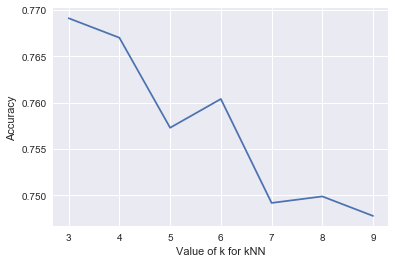

In [270]:
plt.plot(k_range, temp)
plt.xlabel('Value of k for kNN')
plt.ylabel('Accuracy')

The performance deprecates as the value of k increases.

##### Best model dervied from kNN = Model with n_neighbors= 3 : 76.91% accuracy

### (2) Decision Tree Classifier

In [79]:
dt = DecisionTreeClassifier()
scoring (dt)

[ 0.99821358  0.99702263  0.99712187  0.99741961  0.99841191  0.99692308
  0.9973201   0.9973201   0.99771712  0.99741884]


In [80]:
dt_model = dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.99737980864663145

In [81]:
dt_model.score(testat, tesla)

0.7671

In [82]:
dt_model_n = dt.fit(X_train2, y_train2)

In [83]:
dt_model_n.score(X_test2, y_test2)

0.99737980864663145

In [84]:
dt_model_n.score(testat2, tesla)

0.58079999999999998

In [86]:
def prediction(model):
    print(model.score(testat2, tesla))

In [90]:
dt_model_non_split = dt.fit(train, labels)

In [91]:
dt_model_non_split.score(testat, tesla)

0.75890000000000002

In [88]:
dt_model_n_non_split = dt.fit(train2, labels)

In [89]:
prediction(dt_model_n_non_split)

0.6797


Change the parameters

In [95]:
dt2 = DecisionTreeClassifier(min_samples_leaf=3)

In [92]:
def fitting(clf):
    model = clf.fit(train, labels)
    print(model.score(testat, tesla))

In [93]:
def fitting_n(clf):
    model_n = clf.fit(train2, labels)
    print(model_n.score(testat2,tesla))

In [96]:
fitting(dt2)

0.7627


In [97]:
fitting_n(dt2)

0.5758


In [98]:
dt3 = DecisionTreeClassifier(max_depth=20, min_samples_leaf=3)

In [99]:
fitting(dt3)

0.7648


In [100]:
fitting_n(dt3)

0.6839


In [101]:
dt4 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=3)

In [102]:
fitting(dt4)

0.7555


In [103]:
fitting_n(dt4)

0.7589


In [104]:
fitting(dt3)

0.7622


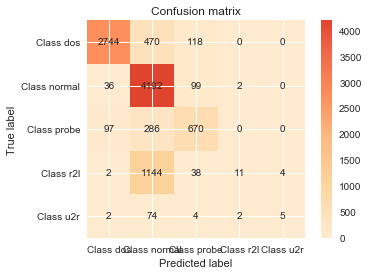

In [107]:
plot.confusion_matrix(tesla, dt3.predict(testat))

Decision Tree의 경우 normalization을 거친 데이터를 사용할 경우가 그렇지 않은 경우보다 좋지 못한 성능을 보여주었다.

이는 대체로 성능을 끌어올리기 위해 normalization을 한다는 점에서는 기대와 대조되는 결과였다.

하지만 normalization이 knn이나 mlp와 같은 각 attribute의 분포가 균등할때 좋은 성능을 경우와 다르게, decision tree의 경우에는 특별히 Normalized dataset이 필요하지 않은 사실(엔트로피 계산에는 각 attribute의 분산이 큰 영향을 미치지 않는다.)이 오히려 반대의 경우가 나온 것 같다는 생각이 들었다. 그래서 본격적으로 각 파라미터 값을 변화시키면서 비교해보았다.

#### (a) Normalized dataset 활용

In [203]:
k_range = range(1,10)
dt_scores = []
for k in k_range:
    dt = DecisionTreeClassifier(min_samples_leaf= k)
    model = dt.fit(train2, labels)
    score = (k, model.score(testat2, tesla))
    dt_scores.append(score)
print (dt_scores)

[(1, 0.59560000000000002), (2, 0.59019999999999995), (3, 0.67910000000000004), (4, 0.67490000000000006), (5, 0.59060000000000001), (6, 0.6976), (7, 0.58399999999999996), (8, 0.68320000000000003), (9, 0.57679999999999998)]


In [204]:
temp = [x[1] for x in dt_scores]
print (temp)

[0.59560000000000002, 0.59019999999999995, 0.67910000000000004, 0.67490000000000006, 0.59060000000000001, 0.6976, 0.58399999999999996, 0.68320000000000003, 0.57679999999999998]


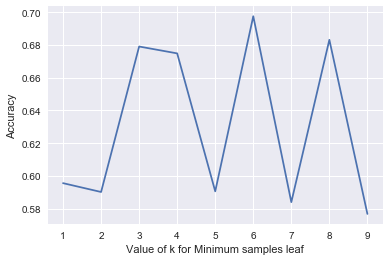

In [205]:
plt.plot(k_range, temp)
plt.xlabel('Value of k for Minimum samples leaf')
plt.ylabel('Accuracy')

In [206]:
d_range = range(7,20)
dt_scores = []
for d in d_range:
    dt = DecisionTreeClassifier(min_samples_leaf= 6, max_depth= d)
    model = dt.fit(train2, labels)
    score = (d, dt.score(testat2, tesla))
    dt_scores.append(score)
print (dt_scores)

[(7, 0.75129999999999997), (8, 0.75590000000000002), (9, 0.75660000000000005), (10, 0.77190000000000003), (11, 0.74890000000000001), (12, 0.77380000000000004), (13, 0.7762), (14, 0.76770000000000005), (15, 0.76790000000000003), (16, 0.77969999999999995), (17, 0.59570000000000001), (18, 0.60150000000000003), (19, 0.59530000000000005)]


In [207]:
temp = [x[1] for x in dt_scores]
print (temp)

[0.75129999999999997, 0.75590000000000002, 0.75660000000000005, 0.77190000000000003, 0.74890000000000001, 0.77380000000000004, 0.7762, 0.76770000000000005, 0.76790000000000003, 0.77969999999999995, 0.59570000000000001, 0.60150000000000003, 0.59530000000000005]


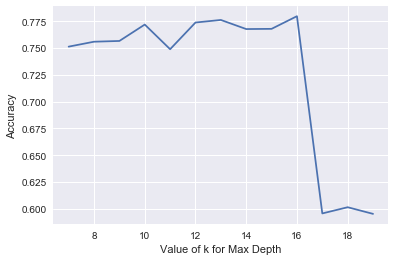

In [208]:
plt.plot(d_range, temp)
plt.xlabel('Value of k for Max Depth')
plt.ylabel('Accuracy')

In [209]:
max(temp)

0.77969999999999995

In [251]:
d_range = range(7,20)
k_range = range(1,9)
dt_scores = []
for d in d_range:
    for k in k_range:
        dt = DecisionTreeClassifier(min_samples_leaf= k, max_depth= d)
        model = dt.fit(train2, labels)
        score = ((d,k), model.score(testat2, tesla))
        dt_scores.append(score)
print (dt_scores)

[((7, 1), 0.74809999999999999), ((7, 2), 0.74509999999999998), ((7, 3), 0.75090000000000001), ((7, 4), 0.75470000000000004), ((7, 5), 0.75139999999999996), ((7, 6), 0.75519999999999998), ((7, 7), 0.75070000000000003), ((7, 8), 0.75149999999999995), ((8, 1), 0.74719999999999998), ((8, 2), 0.73880000000000001), ((8, 3), 0.74039999999999995), ((8, 4), 0.74239999999999995), ((8, 5), 0.75), ((8, 6), 0.74970000000000003), ((8, 7), 0.75), ((8, 8), 0.75070000000000003), ((9, 1), 0.748), ((9, 2), 0.74380000000000002), ((9, 3), 0.751), ((9, 4), 0.74760000000000004), ((9, 5), 0.75109999999999999), ((9, 6), 0.76100000000000001), ((9, 7), 0.75549999999999995), ((9, 8), 0.75180000000000002), ((10, 1), 0.76229999999999998), ((10, 2), 0.76280000000000003), ((10, 3), 0.76649999999999996), ((10, 4), 0.76600000000000001), ((10, 5), 0.77110000000000001), ((10, 6), 0.76670000000000005), ((10, 7), 0.76659999999999995), ((10, 8), 0.76729999999999998), ((11, 1), 0.73850000000000005), ((11, 2), 0.7422999999999

In [255]:
temp = [x[1] for x in dt_scores]
n = len(temp)
num = range(0, n)
print (num)

range(0, 104)


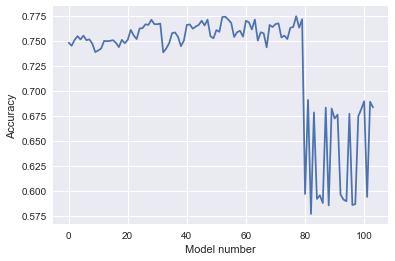

In [256]:
plt.plot(num, temp)
plt.xlabel('Model number')
plt.ylabel('Accuracy')

In [257]:
max(temp)

0.77459999999999996

In [258]:
temp.index(max(temp))

77

In [260]:
dt_scores[77]

((16, 6), 0.77459999999999996)

When max depth is 16 and min_sample_leaf is 6, the model performs best with 77.4% accuracy.

### Feature selection application

In [271]:
feature_names = train.columns
print(feature_names)

Index(['duration', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'icmp', 'tcp',
       'udp'],
      dtype='object')


In [261]:
f_range = range(1, 26)
scores1 = []
for f in f_range:
    selection = SelectKBest(chi2, k=f)
    selection.fit(train2, labels)
    mask = selection.get_support()
    new_features = [] # The list of your K best features

    for bool, feature in zip(mask, feature_names):
        if bool:
            new_features.append(feature)
            
    newtest = testat2[new_features]
    newX = train2[new_features]
    
    n_dt= DecisionTreeClassifier(max_depth= 16, min_samples_leaf=6)
    model = n_rfc.fit(newX, labels)
    scores1.append(model.score(newtest, tesla))
    print(new_features)
    print (scores1)

['dst_host_srv_serror_rate']
[0.50570000000000004]
['srv_serror_rate', 'dst_host_srv_serror_rate']
[0.50570000000000004, 0.51759999999999995]
['serror_rate', 'srv_serror_rate', 'dst_host_srv_serror_rate']
[0.50570000000000004, 0.51759999999999995, 0.54179999999999995]
['serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']
[0.50570000000000004, 0.51759999999999995, 0.54179999999999995, 0.52090000000000003]
['logged_in', 'serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']
[0.50570000000000004, 0.51759999999999995, 0.54179999999999995, 0.52090000000000003, 0.53000000000000003]
['logged_in', 'serror_rate', 'srv_serror_rate', 'dst_host_srv_count', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']
[0.50570000000000004, 0.51759999999999995, 0.54179999999999995, 0.52090000000000003, 0.53000000000000003, 0.6532]
['logged_in', 'serror_rate', 'srv_serror_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate

['logged_in', 'root_shell', 'is_guest_login', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'tcp']
[0.50570000000000004, 0.51759999999999995, 0.54179999999999995, 0.52090000000000003, 0.53000000000000003, 0.6532, 0.66379999999999995, 0.67030000000000001, 0.68259999999999998, 0.70140000000000002, 0.71499999999999997, 0.71599999999999997, 0.72670000000000001, 0.72309999999999997, 0.7198, 0.71519999999999995, 0.72489999999999999, 0.72819999999999996, 0.72809999999999997, 0.72829999999999995, 0.73670000000000002]
['logged_in', 'root_shell', 'is_guest_login', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', '

In [262]:
max(scores1)

0.74099999999999999

Feature selection을 거친 이후의 결과가 그 전의 결과와 비교해서 성능의 향상이 없었다.

이제 이전 실험에서 normalization을 거치지 않은 데이터 셋을 이용했을때 더 좋은 성능을 보였기 때문에, original dataset을 활용하여 실험을 다시 실시하도록 한다.

#### (b) original dataset (pre-normalized) 사용

In [263]:
d_range = range(7,20)
k_range = range(1,9)
dt_scores_ori = []
for d in d_range:
    for k in k_range:
        dt = DecisionTreeClassifier(min_samples_leaf= k, max_depth= d)
        model_ori = dt.fit(train, labels)
        score = ((d,k), model_ori.score(testat, tesla))
        dt_scores_ori.append(score)
print (dt_scores_ori)

[((7, 1), 0.75949999999999995), ((7, 2), 0.76259999999999994), ((7, 3), 0.76329999999999998), ((7, 4), 0.76170000000000004), ((7, 5), 0.76119999999999999), ((7, 6), 0.76129999999999998), ((7, 7), 0.76129999999999998), ((7, 8), 0.76129999999999998), ((8, 1), 0.73209999999999997), ((8, 2), 0.74099999999999999), ((8, 3), 0.74170000000000003), ((8, 4), 0.73919999999999997), ((8, 5), 0.74480000000000002), ((8, 6), 0.74560000000000004), ((8, 7), 0.74399999999999999), ((8, 8), 0.74480000000000002), ((9, 1), 0.73040000000000005), ((9, 2), 0.7359), ((9, 3), 0.73629999999999995), ((9, 4), 0.73499999999999999), ((9, 5), 0.74070000000000003), ((9, 6), 0.7409), ((9, 7), 0.74050000000000005), ((9, 8), 0.74039999999999995), ((10, 1), 0.75790000000000002), ((10, 2), 0.75919999999999999), ((10, 3), 0.75629999999999997), ((10, 4), 0.75929999999999997), ((10, 5), 0.76529999999999998), ((10, 6), 0.76400000000000001), ((10, 7), 0.76380000000000003), ((10, 8), 0.76019999999999999), ((11, 1), 0.752), ((11, 2

In [264]:
temp = [x[1] for x in dt_scores_ori]
n = len(temp)
num = range(0, n)
print (num)

range(0, 104)


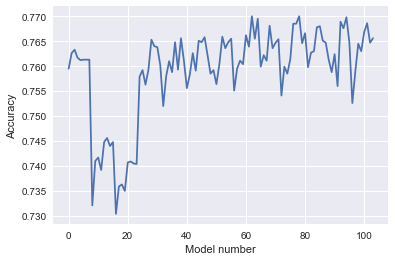

In [265]:
plt.plot(num, temp)
plt.xlabel('Model number')
plt.ylabel('Accuracy')

In [266]:
max(temp)

0.77000000000000002

심층적인 실험결과, 예상대로 normalization을 거친 모델의 경우와 그렇지 않을 경우의 차이가 크지 않음을 확인할 수 있었다. 이를 통해 Decision Tree에서는 Normalization이 굳이 필요하지 않지만, 미세한 차이나마 Normalized된 모델의 성능이 좋았고, 다른 모델들과의 비교를 위해 normalized dataset에서 진행한 모델을 Best model로 선정한다.

##### Best model: Model created on normalized dataset(all features considered) with 16 max depth and 6 minimum sample leaves: 77.45%

### (3) Random Forest

#### (a) Originial dataset

In [217]:
d_range = range(7,15)
k_range = range(1,9)
rfc_scores = []
for d in d_range:
    for k in k_range:
        rfc = RandomForestClassifier(max_depth= d, min_samples_leaf= k)
        model = rfc.fit(train, labels)
        score = ((d,k), model.score(testat, tesla))
        rfc_scores.append(score)
print (rfc_scores)

[((7, 1), 0.74219999999999997), ((7, 2), 0.74109999999999998), ((7, 3), 0.74439999999999995), ((7, 4), 0.748), ((7, 5), 0.74370000000000003), ((7, 6), 0.75049999999999994), ((7, 7), 0.73819999999999997), ((7, 8), 0.752), ((8, 1), 0.74490000000000001), ((8, 2), 0.73960000000000004), ((8, 3), 0.74860000000000004), ((8, 4), 0.75900000000000001), ((8, 5), 0.73909999999999998), ((8, 6), 0.74490000000000001), ((8, 7), 0.74750000000000005), ((8, 8), 0.74709999999999999), ((9, 1), 0.75409999999999999), ((9, 2), 0.74970000000000003), ((9, 3), 0.74150000000000005), ((9, 4), 0.75180000000000002), ((9, 5), 0.75119999999999998), ((9, 6), 0.74170000000000003), ((9, 7), 0.75019999999999998), ((9, 8), 0.749), ((10, 1), 0.75209999999999999), ((10, 2), 0.74970000000000003), ((10, 3), 0.74919999999999998), ((10, 4), 0.74390000000000001), ((10, 5), 0.74070000000000003), ((10, 6), 0.75460000000000005), ((10, 7), 0.75560000000000005), ((10, 8), 0.74390000000000001), ((11, 1), 0.748), ((11, 2), 0.76370000000

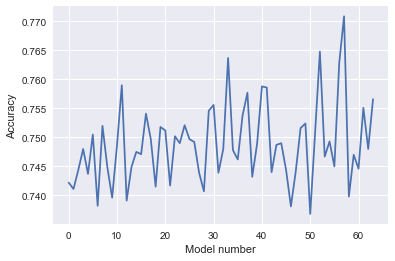

In [218]:
temp = [x[1] for x in rfc_scores]
n = len(temp)
num = range(0, n)
plt.plot(num, temp)
plt.xlabel('Model number')
plt.ylabel('Accuracy')

In [219]:
max(temp)

0.77090000000000003

(14,2)

#### (b) Normalized dataset

In [220]:
d_range = range(7,20)
k_range = range(1,9)
rfc_scores = []
for d in d_range:
    for k in k_range:
        rfc = RandomForestClassifier(max_depth= d, min_samples_leaf= k)
        model = rfc.fit(train2, labels)
        score = ((d,k), model.score(testat2, tesla))
        rfc_scores.append(score)
print (rfc_scores)

[((7, 1), 0.73250000000000004), ((7, 2), 0.73619999999999997), ((7, 3), 0.73380000000000001), ((7, 4), 0.72819999999999996), ((7, 5), 0.73040000000000005), ((7, 6), 0.74319999999999997), ((7, 7), 0.72760000000000002), ((7, 8), 0.73429999999999995), ((8, 1), 0.71819999999999995), ((8, 2), 0.73939999999999995), ((8, 3), 0.74039999999999995), ((8, 4), 0.73599999999999999), ((8, 5), 0.7258), ((8, 6), 0.73770000000000002), ((8, 7), 0.73950000000000005), ((8, 8), 0.73109999999999997), ((9, 1), 0.73280000000000001), ((9, 2), 0.73260000000000003), ((9, 3), 0.71989999999999998), ((9, 4), 0.72799999999999998), ((9, 5), 0.73999999999999999), ((9, 6), 0.76039999999999996), ((9, 7), 0.73099999999999998), ((9, 8), 0.74170000000000003), ((10, 1), 0.74750000000000005), ((10, 2), 0.76049999999999995), ((10, 3), 0.75090000000000001), ((10, 4), 0.73609999999999998), ((10, 5), 0.74419999999999997), ((10, 6), 0.74709999999999999), ((10, 7), 0.74039999999999995), ((10, 8), 0.74239999999999995), ((11, 1), 0.

In [221]:
temp = [x[1] for x in rfc_scores]
n = len(temp)
num = range(0, n)
print(num)

range(0, 104)


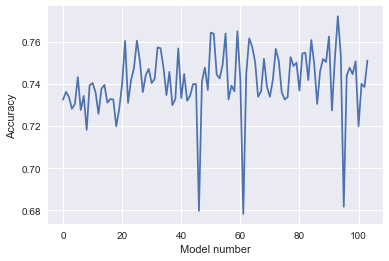

In [222]:
plt.plot(num, temp)
plt.xlabel('Model number')
plt.ylabel('Accuracy')

In [224]:
max(temp)

0.77210000000000001

In [223]:
temp.index(max(temp))

93

In [225]:
rfc_scores[93]

((18, 6), 0.77210000000000001)

In [227]:

e_range = [10,20,30,40,50,60,70,80]
rfc_scores = []
for e in e_range:
      rfc = RandomForestClassifier(max_depth= 18, min_samples_leaf=6, n_estimators= e)
      model = rfc.fit(train2, labels)
      score = (e, model.score(testat2, tesla))
      rfc_scores.append(score)
print (rfc_scores)

[(10, 0.7591), (20, 0.74029999999999996), (30, 0.74960000000000004), (40, 0.74039999999999995), (50, 0.73999999999999999), (60, 0.74739999999999995), (70, 0.74250000000000005), (80, 0.74080000000000001)]


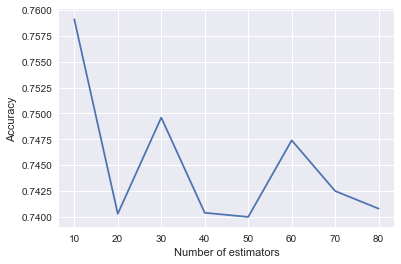

In [228]:
temp = [x[1] for x in rfc_scores]
plt.plot(e_range, temp)
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')

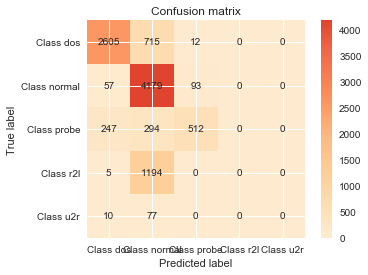

In [229]:
plot.confusion_matrix(tesla, rfc.predict(testat))

In [230]:
max(temp)

0.7591

예상과 다르게 Random Forest Classifier에서 Decision Tree와 비교했을 때 별다른 성능향상을 보여주지 못하였다. (오히려 소숫점 단위이긴 하지만 Decision Tree보다 낮은 성능을 보여주었다.) 오히려, 수행시간을 고려했을 경우 Decision Tree가 더 좋은 모델이라는 점을 확인할 수 있다.

앙상블 모델의 대표라고 할 수 있는 Random Forest가 parameter를 바꾸어도 Decision Tree를 이기지 못한 점은 의외이다.

그래서 Feature selection을 거칠 경우 성능 향상이 있는지 확인하기 위해 Feature Selection도 실시하였다.

#### Applying feature selection

Random Forest에서 Feature selection을 이용하여 성능을 끌어올릴 수 있는지 실험에 보기로 한다.

In [231]:
f_range = range(1, 26)
scores1 = []
for f in f_range:
    selection = SelectKBest(chi2, k=f)
    selection.fit(train2, labels)
    mask = selection.get_support()
    new_features = [] # The list of your K best features

    for bool, feature in zip(mask, feature_names):
        if bool:
            new_features.append(feature)
            
    newtest = testat2[new_features]
    newX = train2[new_features]
    
    n_rfc= RandomForestClassifier(max_depth= 16, min_samples_leaf=6)
    model = n_rfc.fit(newX, labels)
    scores1.append(model.score(newtest, tesla))
    print(new_features)
    print (scores1)

['dst_host_srv_serror_rate']
[0.504]
['srv_serror_rate', 'dst_host_srv_serror_rate']
[0.504, 0.51629999999999998]
['serror_rate', 'srv_serror_rate', 'dst_host_srv_serror_rate']
[0.504, 0.51629999999999998, 0.54179999999999995]
['serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']
[0.504, 0.51629999999999998, 0.54179999999999995, 0.52100000000000002]
['logged_in', 'serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']
[0.504, 0.51629999999999998, 0.54179999999999995, 0.52100000000000002, 0.52600000000000002]
['logged_in', 'serror_rate', 'srv_serror_rate', 'dst_host_srv_count', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']
[0.504, 0.51629999999999998, 0.54179999999999995, 0.52100000000000002, 0.52600000000000002, 0.65700000000000003]
['logged_in', 'serror_rate', 'srv_serror_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']
[0.504, 0.51629999999999998, 0.541799999

['logged_in', 'root_shell', 'is_guest_login', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'tcp', 'udp']
[0.504, 0.51629999999999998, 0.54179999999999995, 0.52100000000000002, 0.52600000000000002, 0.65700000000000003, 0.65659999999999996, 0.67110000000000003, 0.6855, 0.70650000000000002, 0.7077, 0.71830000000000005, 0.71930000000000005, 0.72650000000000003, 0.71909999999999996, 0.72399999999999998, 0.72570000000000001, 0.72560000000000002, 0.72289999999999999, 0.72389999999999999, 0.74239999999999995, 0.74150000000000005]
['logged_in', 'root_shell', 'is_guest_login', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'dif

In [232]:
print(scores1)

[0.504, 0.51629999999999998, 0.54179999999999995, 0.52100000000000002, 0.52600000000000002, 0.65700000000000003, 0.65659999999999996, 0.67110000000000003, 0.6855, 0.70650000000000002, 0.7077, 0.71830000000000005, 0.71930000000000005, 0.72650000000000003, 0.71909999999999996, 0.72399999999999998, 0.72570000000000001, 0.72560000000000002, 0.72289999999999999, 0.72389999999999999, 0.74239999999999995, 0.74150000000000005, 0.73070000000000002, 0.74729999999999996, 0.73509999999999998]


In [233]:
print(max(scores1))

0.7473


In [234]:
scores1.index(max(scores1))

23

Feature Selection을 거쳐도 성능의 향상은 일어나지 않았다.

##### Best model: (max_depth = 18, min_sample_leaf =6, n_estimators = Default) on normalized dataset (all feature considered): 77.21%

### (4) Gradient Boosting

In [235]:
lr_range = [0.09, 0.1, 0.11]
e_range = [90, 100, 110]
gb_scores = []
for lr in lr_range:
    for e in e_range:
        gb = GradientBoostingClassifier(learning_rate= lr, n_estimators= e)
        model = gb.fit(train2, labels)
        score = ((lr,e), model.score(testat2, tesla))
        gb_scores.append(score)
print (gb_scores)

[((0.09, 90), 0.74509999999999998), ((0.09, 100), 0.73709999999999998), ((0.09, 110), 0.7399), ((0.1, 90), 0.73570000000000002), ((0.1, 100), 0.6845), ((0.1, 110), 0.64200000000000002), ((0.11, 90), 0.70679999999999998), ((0.11, 100), 0.68069999999999997), ((0.11, 110), 0.66569999999999996)]


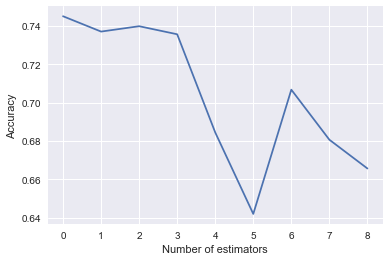

In [236]:
temp = [x[1] for x in gb_scores]
n = len(temp)
num = range(0, n)
plt.plot(num, temp)
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')

In [237]:
max(temp)

0.74509999999999998

In [238]:
temp.index(max(temp))

0

In [239]:
gb_scores[0]

((0.09, 90), 0.74509999999999998)

Gradient Boosting의 경우 실시한 모델 중 체감 상 가장 오랜 시간이 소요된 모델이다. 하지만 기대와는 다르게 성능에서 특별한 향상을 보여주지는 못하였다.

##### Best model = (learning rate = 0.09, n_estimators = 90) on normalized dataset : 74.5% accuracy

### (5) AdaBoost

#### (a) Normalized dataset

In [240]:
lr_range = [0.9, 1.0, 1.1 ]
e_range = [40, 50, 60]
ada_scores = []
for lr in lr_range:
    for e in e_range:
        ada = AdaBoostClassifier(n_estimators= e, learning_rate= lr)
        model = ada.fit(train2, labels)
        score = ((lr,e), model.score(testat2, tesla))
        ada_scores.append(score)
print (ada_scores)

[((0.9, 40), 0.60209999999999997), ((0.9, 50), 0.62150000000000005), ((0.9, 60), 0.60819999999999996), ((1.0, 40), 0.61880000000000002), ((1.0, 50), 0.59599999999999997), ((1.0, 60), 0.44940000000000002), ((1.1, 40), 0.46610000000000001), ((1.1, 50), 0.72240000000000004), ((1.1, 60), 0.7228)]


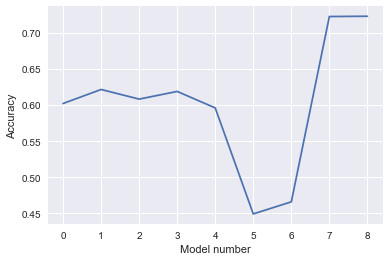

In [241]:
temp = [x[1] for x in ada_scores]
n = len(temp)
num = range(0, n)
plt.plot(num, temp)
plt.xlabel('Model number')
plt.ylabel('Accuracy')

The models with learning rate of 1.1 and 60 estimators have shown a good result

In [242]:
lr_range = [1.1, 1.2 ]
e_range = [40, 50, 60, 70]
ada_scores = []
for lr in lr_range:
    for e in e_range:
        ada = AdaBoostClassifier(n_estimators= e, learning_rate= lr)
        model = ada.fit(train2, labels)
        score = ((lr,e), model.score(testat2, tesla))
        ada_scores.append(score)
print (ada_scores)

[((1.1, 40), 0.46610000000000001), ((1.1, 50), 0.72240000000000004), ((1.1, 60), 0.7228), ((1.1, 70), 0.59050000000000002), ((1.2, 40), 0.57799999999999996), ((1.2, 50), 0.69240000000000002), ((1.2, 60), 0.60519999999999996), ((1.2, 70), 0.39629999999999999)]


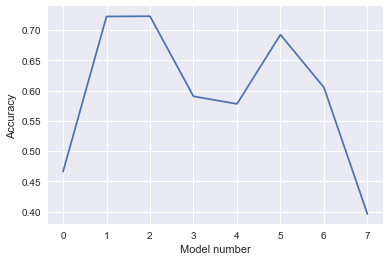

In [243]:
temp = [x[1] for x in ada_scores]
n = len(temp)
num = range(0, n)
plt.plot(num, temp)
plt.xlabel('Model number')
plt.ylabel('Accuracy')

In [244]:
max(temp)

0.7228

#### (b) Original dataset

In [188]:
lr_range = [1.0, 1.1 ]
e_range = [50, 60]
ada_scores = []
for lr in lr_range:
    for e in e_range:
        ada = AdaBoostClassifier(n_estimators= e, learning_rate= lr)
        model = ada.fit(train, labels)
        score = ((lr,e), model.score(testat, tesla))
        ada_scores.append(score)
print (ada_scores)

[((1.0, 50), 0.63949999999999996), ((1.0, 60), 0.56899999999999995), ((1.1, 50), 0.6915), ((1.1, 60), 0.67420000000000002)]


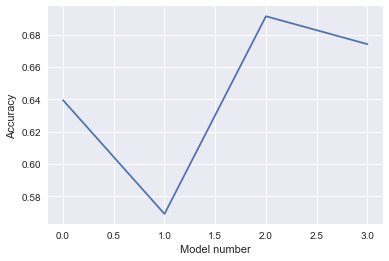

In [189]:
temp = [x[1] for x in ada_scores]
n = len(temp)
num = range(0, n)
plt.plot(num, temp)
plt.xlabel('Model number')
plt.ylabel('Accuracy')

#### Feature selection on best model

In [190]:
f_range = range(1, 26)
scores1 = []
for f in f_range:
    selection = SelectKBest(chi2, k=f)
    selection.fit(train2, labels)
    mask = selection.get_support()
    new_features = [] # The list of your K best features

    for bool, feature in zip(mask, feature_names):
        if bool:
            new_features.append(feature)
            
    newtest = testat2[new_features]
    newX = train2[new_features]
    
    n_ada= AdaBoostClassifier(base_estimator=60, learning_rate=1.1)
    model = n_rfc.fit(newX, labels)
    scores1.append(model.score(newtest, tesla))
    print(new_features)
    print (scores1)

['dst_host_srv_serror_rate']
[0.5091]
['srv_serror_rate', 'dst_host_srv_serror_rate']
[0.5091, 0.51549999999999996]
['serror_rate', 'srv_serror_rate', 'dst_host_srv_serror_rate']
[0.5091, 0.51549999999999996, 0.54169999999999996]
['serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']
[0.5091, 0.51549999999999996, 0.54169999999999996, 0.52100000000000002]
['logged_in', 'serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']
[0.5091, 0.51549999999999996, 0.54169999999999996, 0.52100000000000002, 0.5282]
['logged_in', 'serror_rate', 'srv_serror_rate', 'dst_host_srv_count', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']
[0.5091, 0.51549999999999996, 0.54169999999999996, 0.52100000000000002, 0.5282, 0.6512]
['logged_in', 'serror_rate', 'srv_serror_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']
[0.5091, 0.51549999999999996, 0.54169999999999996, 0.52100000000000002, 0

['logged_in', 'root_shell', 'is_guest_login', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'tcp', 'udp']
[0.5091, 0.51549999999999996, 0.54169999999999996, 0.52100000000000002, 0.5282, 0.6512, 0.65820000000000001, 0.66679999999999995, 0.68000000000000005, 0.7046, 0.70030000000000003, 0.72060000000000002, 0.71779999999999999, 0.7329, 0.72450000000000003, 0.72330000000000005, 0.73560000000000003, 0.73050000000000004, 0.73740000000000006, 0.72819999999999996, 0.74870000000000003, 0.7288]
['logged_in', 'root_shell', 'is_guest_login', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'ds

In [191]:
print(max(scores1))

0.7487


실험 중 처음으로 Feature selection이 성능향상을 보여준 케이스이다. 하지만 원체 성능이 다른 모델에 비해 좋지 않았기 때문에, 큰 효과는 없다고 할 수 있다. 다만 Feature selection이 성능향상을 이끌어낼 수 있다는 점을 눈으로 확인할 수 있었던 의의가 있다고 할 수 있다.

The improvement is not efficacious to beat the best model so far

##### Best model : (learning rate = 1.1, n_estimators = 60) on normalized dataset (with features of ['logged_in', 'root_shell', 'is_guest_login', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'tcp']): 74.87%

### (6) Multilayer Perceptron

Number of input = 43

Number of output = 5

(43+5)/2 = 24 (this can be used for number of hidden nodes.)


In [198]:
h_range = [(24), (24, 24), (24, 24, 24), (24, 24, 24, 24), (24, 24, 24, 24, 24), (24, 24, 24, 24, 24, 24), (48), (48, 48), (48, 48, 48), (48, 48, 48, 48)]
mlp_scores = []
for h in h_range:
        mlp = MLPClassifier(hidden_layer_sizes= h)
        model = mlp.fit(train2, labels)
        score = (h, model.score(testat2, tesla))
        mlp_scores.append(score)
print (mlp_scores)

[(24, 0.76759999999999995), ((24, 24), 0.77029999999999998), ((24, 24, 24), 0.7611), ((24, 24, 24, 24), 0.78610000000000002), ((24, 24, 24, 24, 24), 0.749), ((24, 24, 24, 24, 24, 24), 0.7429), (48, 0.76029999999999998), ((48, 48), 0.7772), ((48, 48, 48), 0.7762), ((48, 48, 48, 48), 0.79149999999999998)]


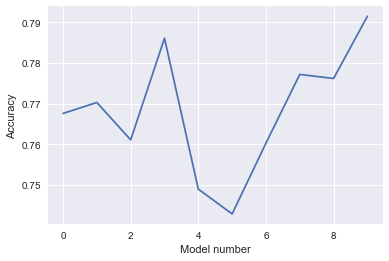

In [199]:
temp = [x[1] for x in mlp_scores]
n = len(temp)
num = range(0, n)
plt.plot(num, temp)
plt.xlabel('Model number')
plt.ylabel('Accuracy')

In [201]:
new_mlp = MLPClassifier(hidden_layer_sizes= (48,48,48,48,48))
model2 = new_mlp.fit(train2, labels)
score = model2.score(testat2, tesla)

In [202]:
print(score)

0.7593


인공신경망 모델에 해당하는 MLP에서 지금껏 가장 좋은 성능을 보여줬다(79.15%). Hidden nodes의 배치는 수업에서 배운 weka의 방식 (input nodes+ output nodes)/2에서 시작하여 (input nodes + output nodes) 방식으로 늘려가면서 실시하였다. 

So far, the best model derived from MLP is the model with (48,48,48,48) hidden inputs with the accuracy of 79.15%

##### Best model : (48, 48, 48, 48) model : 79.15% accuracy  

### (7) NaiveBayesian

In [250]:
nb = GaussianNB()
model = nb.fit(train2, labels)
score = model.score(testat2, tesla)
print (score)

0.4535


Naive Bayesian의 경우 성능이 너무 나빠 feature selection을 생락한다.

##### Best model : 45.35 %

## 결론

예상과 다르게 Ensemble 모형에서 좀 더 나은 성능을 보여주지 못하였다. 

시간 복잡도와 리소스를 고려할 경우, Decision Tree의 압승이라고 해석해도 이상하지 않을 것이다.

물론, 전체 7 종류의 알고리즘을 활용한 결과를 비교했을 때에는, MLP에서 가장 좋은 성능을 도출하였다. 하지만 마지막으로 또 다른 앙상블의
일종인 Stacking을 활용하여 좀 더 나은 성능에 도전해보도록 한다.

## (9) Stacking the best models

In [279]:
best_mlp = MLPClassifier(hidden_layer_sizes= (48, 48, 48, 48))
best_mlp_model = best_mlp.fit (train2, labels)
mlp_score = best_mlp_model.score(testat2, tesla)
print (mlp_score)

0.7595


다시 실험을 실시한 결과, MLP의 성능이 저하되는 현상이 발생하였다. (반복할 수록 저하...)

In [276]:
best_dt = DecisionTreeClassifier(max_depth=16, min_samples_leaf= 6)
best_dt_model = best_dt.fit (train2, labels)
dt_score = best_dt_model.score(testat2, tesla)
print (dt_score)

0.7733


In [280]:
best_rf = RandomForestClassifier(max_depth= 18, min_samples_leaf= 6)
best_rf_model = best_rf.fit (train2, labels)
rf_score = best_rf_model.score(testat2, tesla)
print (rf_score)

0.7545


Random Forest의 경우도 다시 실시했을 때에 성능의 저하가 발생하였다.

### BEST MODEL OVERALL

In [282]:
vc = VotingClassifier(estimators=[('mlp', MLPClassifier(hidden_layer_sizes=(48,48,48,48))), 
                                  ('dt', DecisionTreeClassifier(max_depth=16, min_samples_leaf=6)),
                                 ('rf', RandomForestClassifier(max_depth= 18,min_samples_leaf= 6))], voting = 'soft')
vc.fit (train2, labels)
vc.score(testat2, tesla)

0.78720000000000001

예상과 다르게 같은 파라미터로 MLP를 설계하였을때 성능의 저하가 일어났기 때문에, 안정적으로 Stacking algorithm을 Best Classifier로 선정한다.